In [17]:
import pandas as pd

#Unemployment Rate
unemployment_df = pd.read_csv('city_unemployment_rate.csv')
unemployment_asc = unemployment_df.sort_values(by='Unemployment Rate')
unemployment_desc = unemployment_df.sort_values(by='Unemployment Rate',ascending=False)



In [ ]:

#Quality of Life Ratings
quality_life_df = pd.read_csv('quality_of_life.csv')
quality_life_df

#Cost of Living statistics
cost_living_df = pd.read_csv('cost_of_living.csv')
cost_living_df.head()


In [62]:
#US Cities
cities_df = pd.read_csv('uscities.csv')
city_density_df = cities_df.sort_values(by='density',ascending=False)
city_population_df = cities_df.sort_values(by='population',ascending=False)
# cities_df.head()


Text(0.5, 0, 'US Cities')

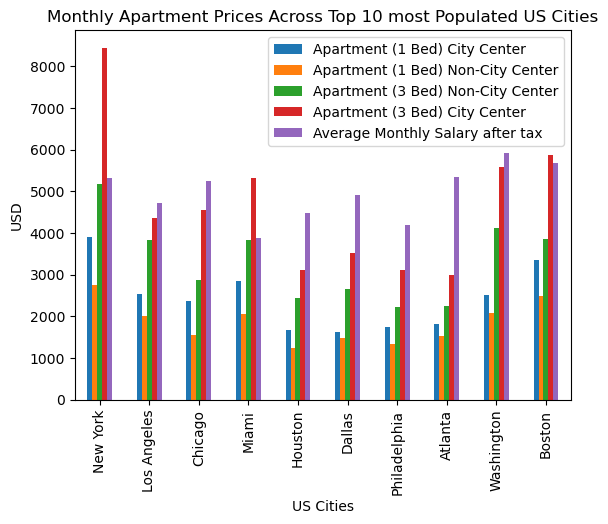

In [166]:
import ast
import matplotlib.pyplot as plt # for additional customization

# Function to safely convert string -> tuple
def str_to_tuple(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None

#Build a table of the 10 most populated cities and rank the cost of a 1 Bedroom apartment in the city center
cities_top_10_pop = city_population_df[0:10]
cities_top_10_pop_cost = dict()

for index,row in cities_top_10_pop.iterrows():
    try:
        city = row.values[1].strip()
        city_costs= cost_living_df.loc[cost_living_df['City'] == city]
        avg_1BR_citycenter = str_to_tuple(city_costs['Apartment (1 bedroom) in City Centre'].values[0])[0]
        avg_3BR_citycenter = str_to_tuple(city_costs['Apartment (3 bedrooms) in City Centre'].values[0])[0]
        avg_1BR_non_citycenter = str_to_tuple(city_costs['Apartment (1 bedroom) Outside of Centre'].values[0])[0]
        avg_3BR_non_citycenter = str_to_tuple(city_costs['Apartment (3 bedrooms) Outside of Centre'].values[0])[0]

        #avg_meal = str_to_tuple(city_costs["Meal, Inexpensive Restaurant"].values[0])[0]
        avg_salary = str_to_tuple(city_costs['Average Monthly Net Salary (After Tax)'].values[0])[0]
        cities_top_10_pop_cost[city] = [avg_1BR_citycenter, avg_1BR_non_citycenter, avg_3BR_non_citycenter, avg_3BR_citycenter, avg_salary]
    except:
        pass

df = pd.DataFrame(cities_top_10_pop_cost)
df.index = ['Apartment (1 Bed) City Center','Apartment (1 Bed) Non-City Center','Apartment (3 Bed) Non-City Center','Apartment (3 Bed) City Center','Average Monthly Salary after tax']
city_costs = df.T
city_costs = city_costs.map(lambda x: float(str(x).replace(',', '')))

# Plotting a bar graph for the 'Values' column
ax = city_costs.plot(kind='bar')
ax.set_title('Monthly Apartment Prices Across Top 10 most Populated US Cities')
ax.set_ylabel('USD')
ax.set_xlabel('US Cities')
